            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

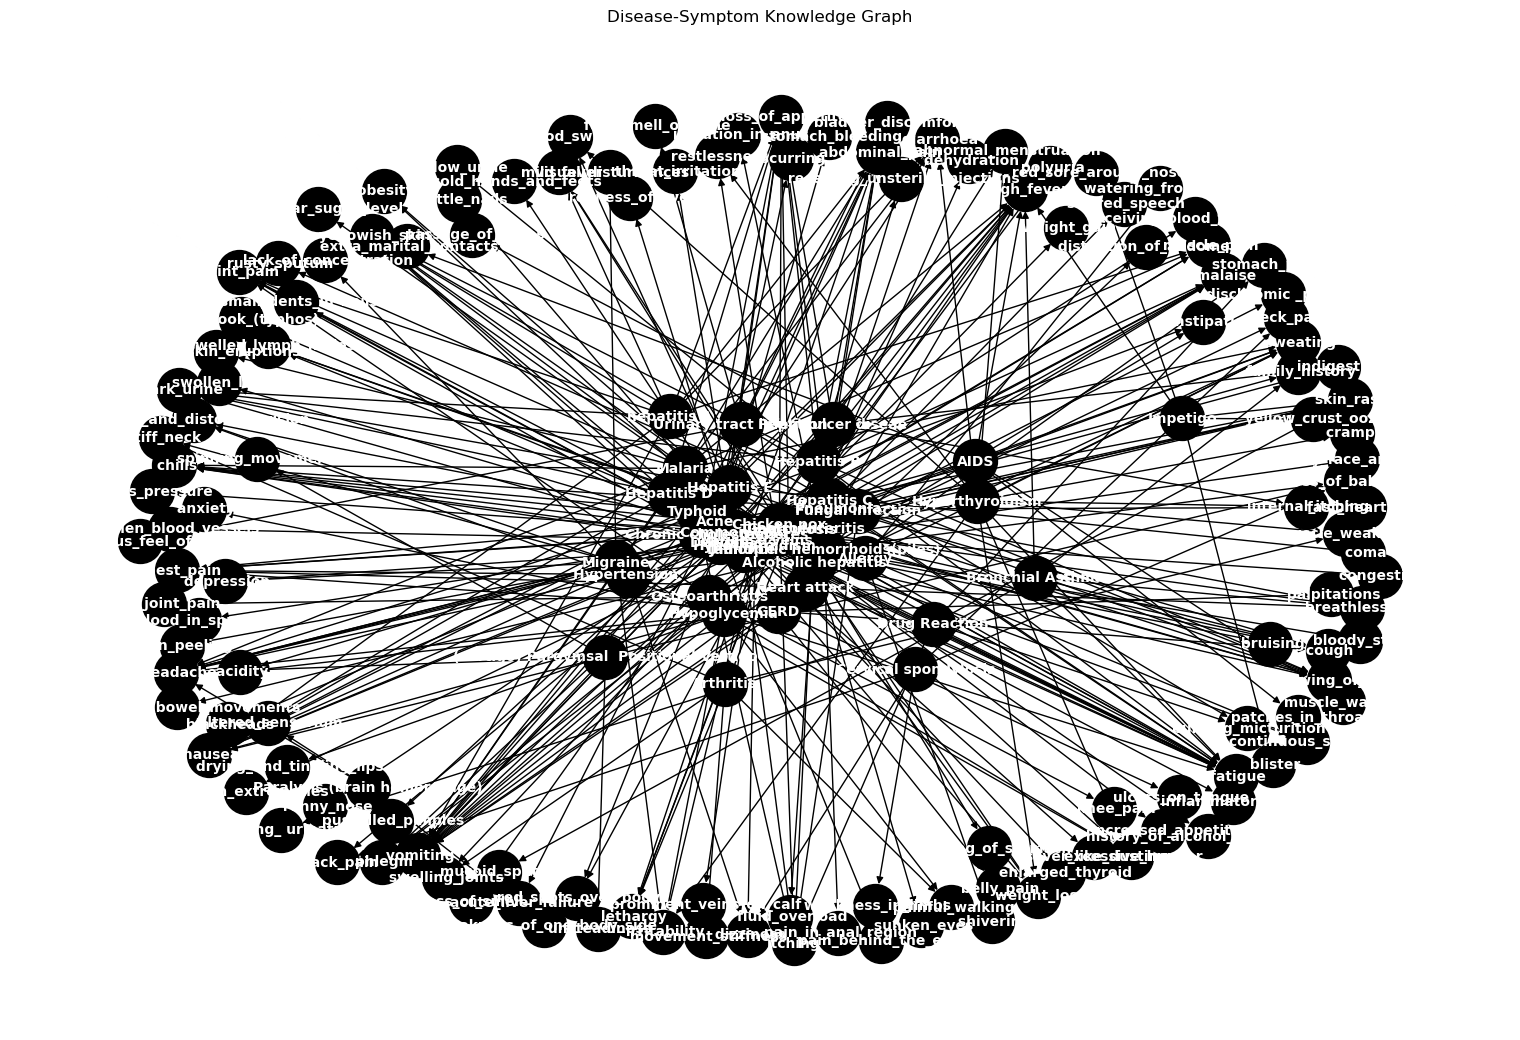

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


dataset = pd.read_csv('dataset.csv')
print(dataset.head())


symptom_description = pd.read_csv('symptom_Description.csv')
print(symptom_description.head())


symptom_precaution = pd.read_csv('symptom_precaution.csv')
print(symptom_precaution.head())


symptom_severity = pd.read_csv('symptom-severity.csv')
print(symptom_severity.head())


symptom_columns = [f'Symptom_{i}' for i in range(1, 18)]


G = nx.DiGraph()


diseases = dataset['Disease'].tolist()
G.add_nodes_from(diseases, type='disease')


symptoms = set()
for col in symptom_columns:
    symptoms.update(dataset[col].dropna().unique())

G.add_nodes_from(symptoms, type='symptom')


for index, row in dataset.iterrows():
    disease = row['Disease']
    for symptom_col in symptom_columns:
        symptom = row[symptom_col]
        if pd.notna(symptom):
            G.add_edge(disease, symptom)


plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=1000, node_color='black', with_labels=True, font_size=10, font_color='white', font_weight='bold')
plt.title('Disease-Symptom Knowledge Graph')
plt.show()

